## Analyzing Healthcare Spending Disparities in the USA & provide data-driven policy recommendations


### Overall Picture: 

Perform a comprehensive analysis of healthcare spending patterns in the United States over two decades, focusing on understanding disparities among different payers, health conditions, age groups, and types of care. 

### Goal:
This project aims to provide data-driven insights that can lead to informed policy recommendations for optimizing healthcare spending.

### Who would benefit: 
1. Healthcare policymakers
2. Government agencies 
3. Insurance providers 
4. General public


### Methodology: 
1. Data Preparation: Clean and preprocess the dataset to ensure data accuracy. 
2. Descriptive Analytics: Generate descriptive statistics to understand dataset characteristics. 
3. Data Visualization: Create informative data visualizations to represent spending patterns. 
4. Segmentation Analysis: Analyze spending patterns by payers, health conditions, age groups, and types of care. 
5. Policy Recommendations: Develop data-driven recommendations for policy improvement. 


### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Loading Dataset

In [3]:
# Load the dataset
df = pd.read_csv('obesity_data.csv')

### Exploring Data Columns and values

In [4]:
# Explore basic data characteristics
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106113 entries, 0 to 106112
Data columns (total 22 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year_id         106113 non-null  int64  
 1   age_group_id    106113 non-null  int64  
 2   age_group_name  106113 non-null  object 
 3   sex_id          106113 non-null  int64  
 4   sex             106113 non-null  object 
 5   function        106113 non-null  object 
 6   type_of_care    106113 non-null  object 
 7   acause          106113 non-null  object 
 8   cause_name      106113 non-null  object 
 9   cause_id        90006 non-null   float64
 10  mean_all        106113 non-null  float64
 11  lower_all       106113 non-null  float64
 12  upper_all       106113 non-null  float64
 13  mean_pub        106113 non-null  float64
 14  lower_pub       106113 non-null  float64
 15  upper_pub       106113 non-null  float64
 16  mean_pri        106113 non-null  float64
 17  lower_pri 

### Filling missing values in dataset

In [ ]:
# Handle missing values
df.fillna(df.mean(), inplace=True)

# Exploratory Data Analysis

## USA Healthcare Spending Pattern 1996 - 2016 Trend

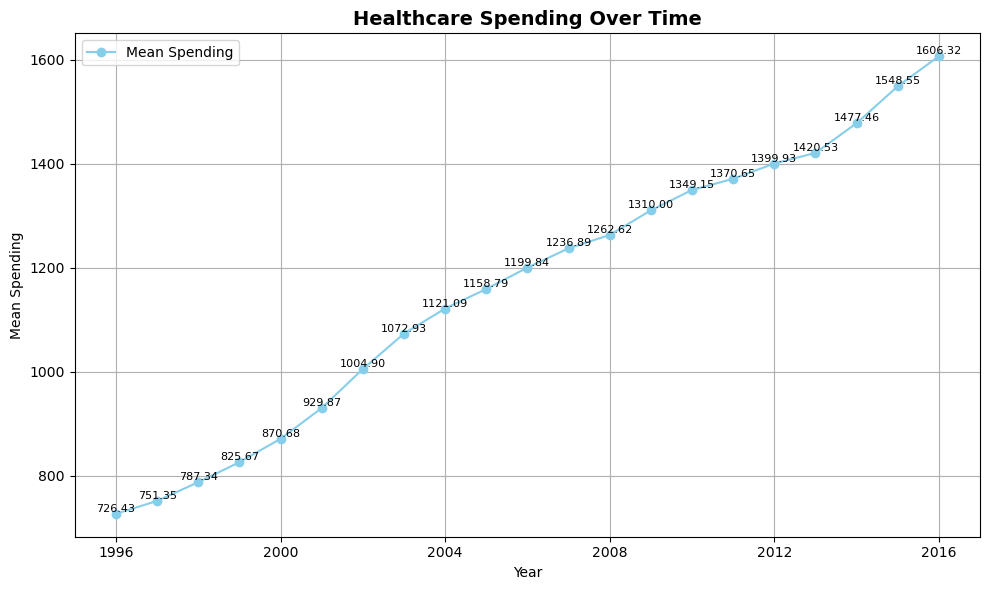

In [5]:
#Visual Enhancement:
#Consider using a line plot to better visualize the trend over time.
#Add labels to the data points for better clarity.
#Use a color palette that is easy on the eyes.

#Code Improvement:
#Ensure that the code is concise and follows best practices.
#Add comments for clarity.

import matplotlib.pyplot as plt
import pandas as pd

# Convert 'year_id' to integers
df['year_id'] = df['year_id'].astype(int)

# Group by 'year_id' and calculate mean spending
yearly_spending = df.groupby('year_id')['mean_all'].mean()

# Set 'year_id' as the index for proper plotting
yearly_spending.index = pd.to_datetime(yearly_spending.index, format='%Y')
yearly_spending.sort_index(inplace=True)

# Plotting the results with proper year progression
plt.figure(figsize=(10, 6))

# Use a line plot for better visualization
plt.plot(yearly_spending.index, yearly_spending.values, marker='o', linestyle='-', color='skyblue', label='Mean Spending')

# Add labels to data points for better clarity
for i, value in enumerate(yearly_spending.values):
    plt.text(yearly_spending.index[i], value, f'{value:.2f}', ha='center', va='bottom', fontsize=8)

plt.title('Healthcare Spending Over Time', fontweight='bold', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Mean Spending')
plt.legend()
plt.grid(True)
plt.tight_layout()  # Adjust layout for better aesthetics
plt.show()


### Insights:
1. **Economic Growth Impact:** The steep increase in healthcare spending may be linked to overall economic growth, reflecting a greater capacity for healthcare expenditure as the economy expands.

2. **Aging Population Influence:** The rise could be driven by the aging population, as older individuals tend to require more healthcare services, contributing to increased spending over the years.

3. **Technological Advancements:** Advances in medical technology and treatments may be contributing to the upward trend in spending, reflecting the costs associated with adopting new and often expensive healthcare innovations.

## USA Healthcare Spending Disparity between Men & Women from 1996 - 2016 

Mean Healthcare Spending by Gender:
sex
Female    1339.318861
Male       948.504352
Name: mean_all, dtype: float64


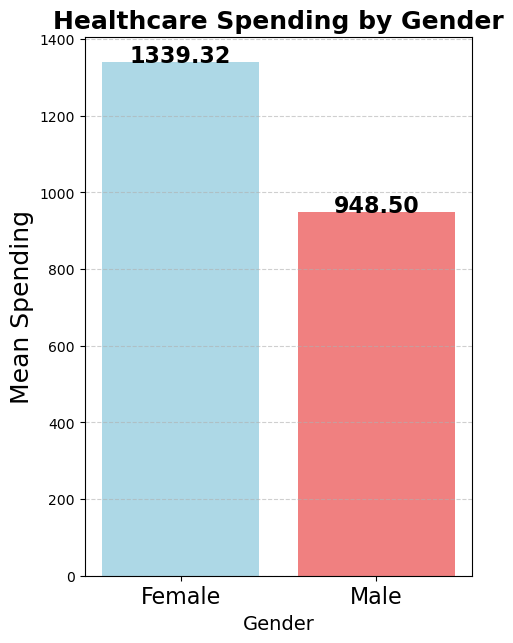

In [6]:

# Analyze spending disparities between genders excluding 'Both'
gender_spending = df[df['sex'] != 'Both'].groupby('sex')['mean_all'].mean()

# Print actual spending values
print("Mean Healthcare Spending by Gender:")
print(gender_spending)

# Plotting the results with a vertical bar chart
plt.figure(figsize=(5, 7))  # Adjusted figure size for better fit
colors = ['lightblue', 'lightcoral']  # Using lighter colors for better readability
bars = plt.bar(gender_spending.index, gender_spending.values, color=colors)
plt.title('Healthcare Spending by Gender', fontweight='bold', fontsize=18)  # Increased title font size
plt.xlabel('Gender', fontsize=14)  # Increased x-axis label font size
plt.ylabel('Mean Spending', fontsize=18)  # Increased y-axis label font size

# Adding mean spending values on the bars with increased font size
for bar, value in zip(bars, gender_spending.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f'{value:.2f}', 
             ha='center', fontweight='bold', fontsize=16)  # Increased font size

# Increase font size of x-axis labels
plt.xticks(fontsize=16)

plt.grid(axis='y', linestyle='--', alpha=0.6)  # Adding a grid for reference
plt.show()

### Insights:
1. **Gender Spending Gap:** Females spend significantly more on healthcare than males, pointing to a notable gender disparity in healthcare expenses.

2. **Financial Burden on Females:** The considerable difference suggests a higher financial burden on females, potentially linked to factors like reproductive health or longer life expectancy.

3. **Diverse Health Priorities:** Varied spending patterns may reflect different health priorities between genders, emphasizing the need for tailored healthcare services.

4. **Policy Implications:** Policymakers should address these gender-based spending gaps to ensure equitable access to healthcare services.

5. **Tailoring Healthcare Services:** Healthcare providers should consider gender-specific health needs for effective and equitable service planning.

### Data Considerations:
1. Excluded 'Both' gender category for a more focused analysis.
2. Values are based on the mean of healthcare spending.

## USA Healthcare Spending for different Healthcare Spending by Age Group and Gender from 1996 - 2016 

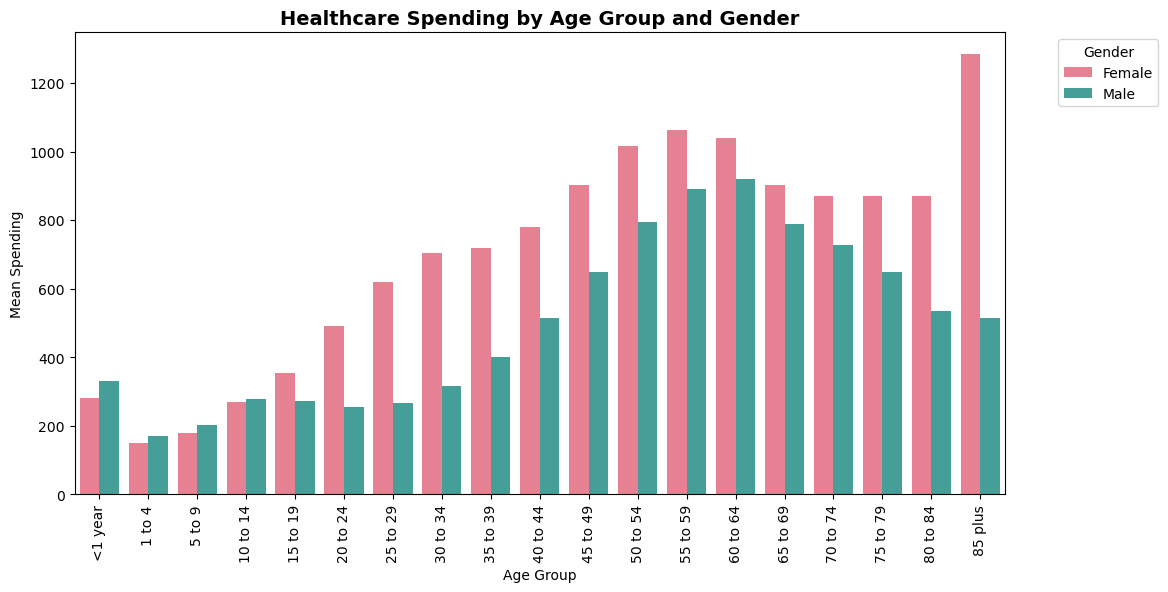

In [7]:
import seaborn as sns

# Segment the data based on age group name and gender
   # The original dataset is grouped by 'age_group_name' and 'sex' to calculate the mean healthcare spending 
   #('mean_all') for each group.
   # The data is then unstacked and reset to create a DataFrame suitable for visualization.

age_gender_spending = df.groupby(['age_group_name', 'sex'])['mean_all'].mean().unstack().reset_index()

# Melt the DataFrame to create a suitable format for Seaborn
    # The DataFrame is melted to create a format suitable for Seaborn, where 'age_group_name' is 
    #retained as the identifier variable, and 'Female' and 'Male' become value variables.

melted_df = pd.melt(age_gender_spending, id_vars=['age_group_name'], value_vars=['Female', 'Male'], 
                    var_name='Gender', value_name='Mean Spending')

# Define a custom order for age groups
    # A custom order for age groups ('custom_order') is defined to ensure a meaningful x-axis order in the plot.
    # Seaborn's `barplot` function is then used to visualize mean spending with 'age_group_name' on the x-axis, 
    #'Mean Spending' on the y-axis, and differentiation by 'Gender' using different hues. 
    # The order of hue ('Female', 'Male') and x-axis labels is specified.

custom_order = ['<1 year', '1 to 4', '5 to 9', '10 to 14', '15 to 19', '20 to 24', '25 to 29', '30 to 34', 
                '35 to 39', '40 to 44', '45 to 49', '50 to 54', '55 to 59', '60 to 64', '65 to 69', '70 to 74', 
                '75 to 79', '80 to 84', '85 plus']

# Plotting the results with Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='age_group_name', y='Mean Spending', hue='Gender', data=melted_df, palette='husl', 
            hue_order=['Female', 'Male'], order=custom_order)
plt.title('Healthcare Spending by Age Group and Gender', fontweight='bold', fontsize=14)
plt.xlabel('Age Group')
plt.ylabel('Mean Spending')
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation='vertical')  # Rotate x-axis labels vertically
plt.show()

# This visualization provides a clear representation of how healthcare spending varies across age groups, segmented by gender.

### Insights:
1. **Elderly Female Healthcare Needs:** The higher spending in the >85 years category for females suggests increased healthcare needs and potential chronic conditions among elderly women.

2. **Midlife Male Health Focus:** The peak in spending for males at 60-64 years indicates a potential focus on addressing health issues specific to this age group, such as age-related conditions or preventive measures.

3. **Gender Disparity Dynamics:** The growing spending disparity from 15-19 years, peaking in the 35-39 years category, may indicate gender-specific health challenges during these periods, warranting targeted interventions.

4. **Healthcare Interventions in Later Years:** The reduction in spending difference from 50-54 to 70-74 years may reflect shared healthcare needs or similar interventions for both genders as they approach older age.

5. **Infant Healthcare Prioritization:** Male spending exceeding females in the <1 year category suggests potential emphasis on male infant healthcare or specific health challenges requiring higher attention.

6. **Uniform Pediatric Healthcare:** Similar spending patterns for both genders from 1-14 years imply a relatively uniform approach to pediatric healthcare during these formative years.

## USA Healthcare Spending by type of care from 1996 - 2016 

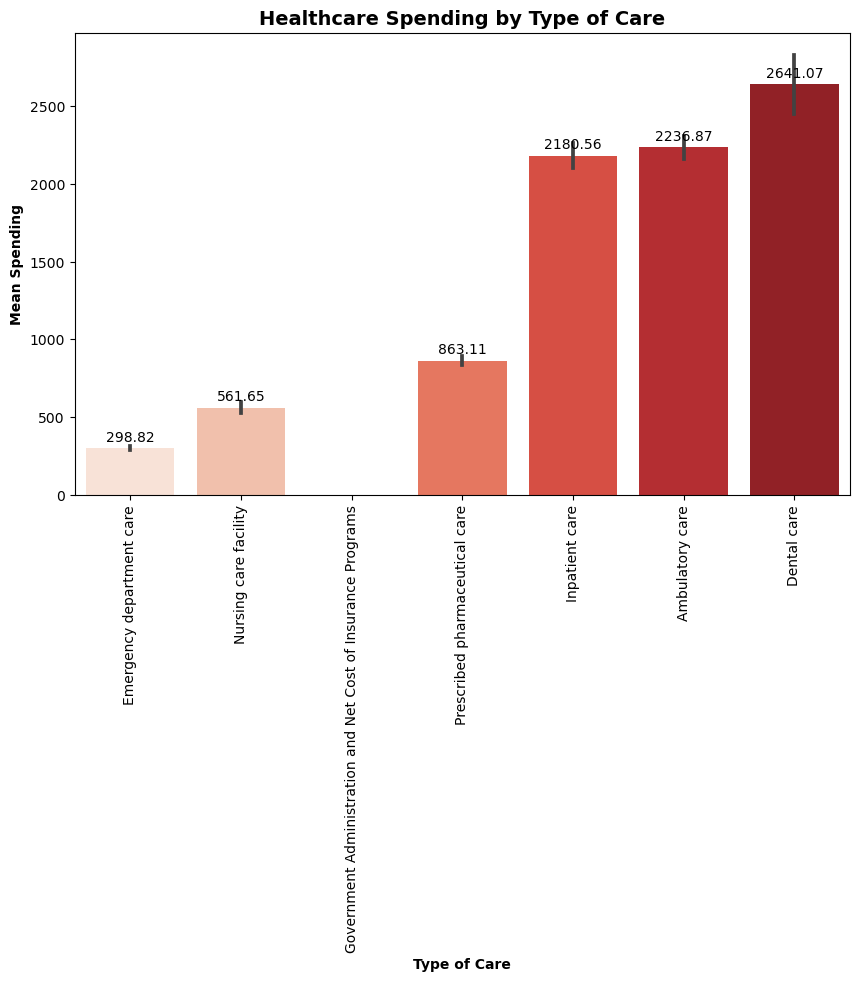

In [8]:
import seaborn as sns

# Explore spending patterns based on types of care
care_spending = df.groupby('type_of_care')['mean_all'].mean()

# Define a custom order for types of care based on mean spending
custom_order_care = care_spending.sort_values().index

# Replace 'Government Administration and Net Cost of Insurance Programs' with a shorter name
df['type_of_care'] = df['type_of_care'].replace({'Government Administration and Net Cost of Insurance Programs': 'Gov_Admin'})

# Plotting the results with a specified order and graded colors
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='type_of_care', y='mean_all', data=df, order=custom_order_care, palette=sns.color_palette("Reds", n_colors=len(custom_order_care)))
plt.title('Healthcare Spending by Type of Care', fontweight='bold', fontsize=14)
plt.xlabel('Type of Care', fontweight='bold', fontsize=10)
plt.ylabel('Mean Spending', fontweight='bold', fontsize=10)

# Rotate x-axis labels vertically
plt.xticks(rotation='vertical')

# Display mean spending values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


### Insights:

**1. Dental Care Mean Spending:**
   - Dental Care's substantial mean spending could be influenced by factors such as the rising costs of dental procedures, increased demand for cosmetic dentistry, or disparities in dental insurance coverage. 
   - Further investigation into these factors can guide policymakers in addressing potential cost drivers and improving access to affordable dental care.

**2. Emergency Department Care Spending:**
  - The low mean spending on Emergency Department Care may suggest efficiency in managing emergency cases or efficient use of resources. 
  - Alternatively, it could indicate challenges in accessing emergency services, leading to lower overall spending. Understanding the reasons behind this observation can inform strategies for optimizing emergency care delivery.

**3. Inpatient Care and Ambulatory Care Spending:**
   - The similar mean spending between Inpatient Care and Ambulatory Care may reflect a balanced approach to healthcare, where both inpatient and outpatient services are utilized in proportion to their respective capabilities. 
   - Evaluating the quality of care and patient outcomes in these settings can provide insights into the effectiveness of the healthcare delivery model.

**4. Top 3 Spending Categories:**
   - The dominance of Inpatient Care, Ambulatory Care, and Dental Care in spending underscores their critical roles in the U.S. healthcare system. 
   - Policymakers may consider targeted interventions, such as cost containment measures for high-spending categories or initiatives to enhance preventive dental care, to achieve a more balanced and cost-effective healthcare landscape.


## USA Healthcare Spending by pattern of health condition from 1996 - 2016 

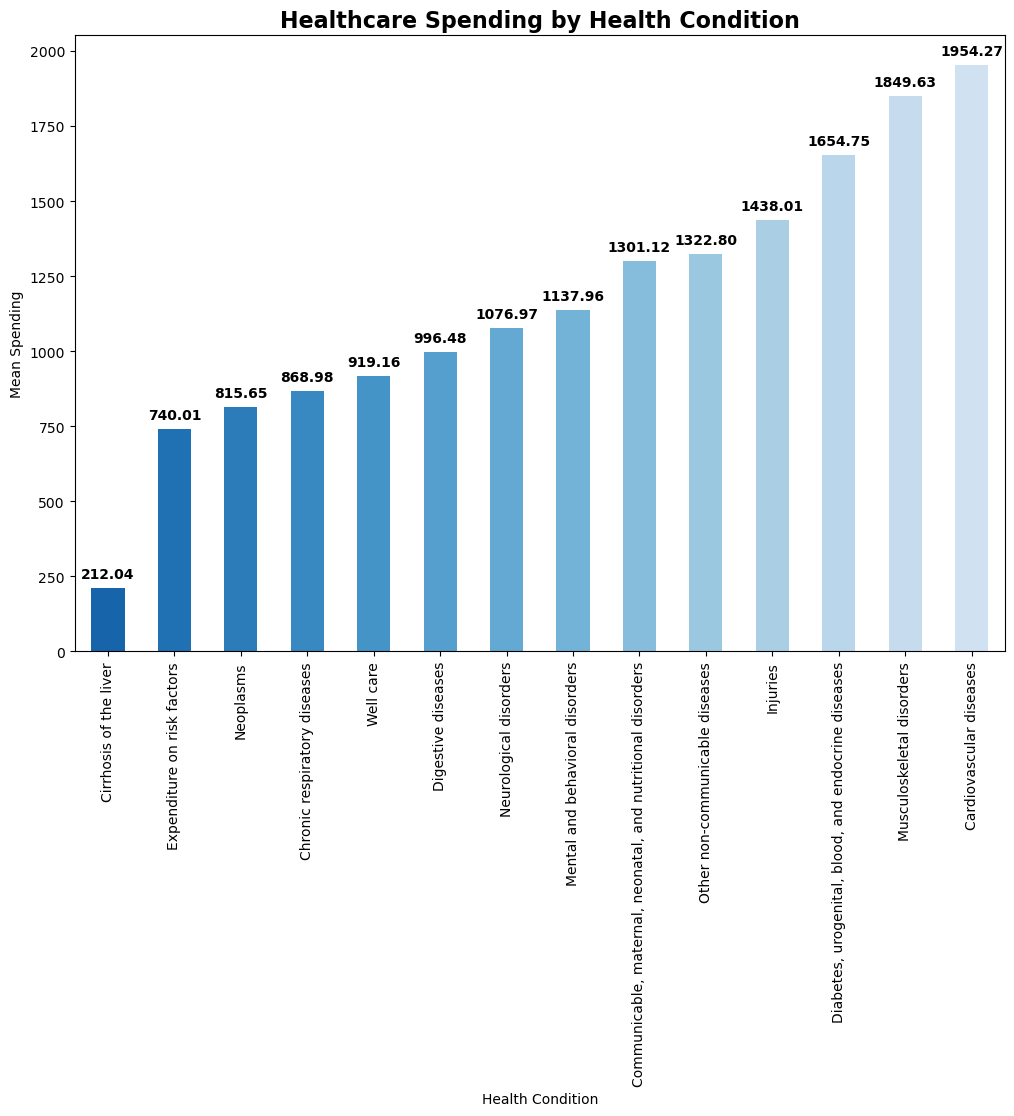

Cirrhosis of the liver: 212.04
Expenditure on risk factors: 740.01
Neoplasms: 815.65
Chronic respiratory diseases: 868.98
Well care: 919.16
Digestive diseases: 996.48
Neurological disorders: 1076.97
Mental and behavioral disorders: 1137.96
Communicable, maternal, neonatal, and nutritional disorders: 1301.12
Other non-communicable diseases: 1322.80
Injuries: 1438.01
Diabetes, urogenital, blood, and endocrine diseases: 1654.75
Musculoskeletal disorders: 1849.63
Cardiovascular diseases: 1954.27


In [9]:
# Increased bar width and colour gradient for better visualisation

import matplotlib.pyplot as plt
import numpy as np

# Analyze spending patterns by health condition
condition_spending = df.groupby('cause_name')['mean_all'].mean()

# Sort the health conditions by mean spending
condition_spending_sorted = condition_spending.sort_values()

# Define a color map for gradient (Blues: light to dark)
colors = plt.cm.Blues_r(np.linspace(0.2, 0.8, len(condition_spending_sorted)))

# Plotting the results with sorted order and color gradient
plt.figure(figsize=(12, 8))
ax = condition_spending_sorted.plot(kind='bar', color=colors)
plt.title('Healthcare Spending by Health Condition', fontweight='bold', fontsize=16)
plt.xlabel('Health Condition')
plt.ylabel('Mean Spending')

# Annotate each bar with the exact value (values in black color)
for p, color in zip(ax.patches, colors):
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', 
                fontsize=10, fontweight='bold', color='black')

# Rotate x-axis labels vertically for better readability
plt.xticks(rotation='vertical')

plt.show()

# Display values in text
for index, value in enumerate(condition_spending_sorted):
    print(f'{condition_spending_sorted.index[index]}: {value:.2f}')


## Insights
**Further Insights and Considerations**

1. **Cardiovascular Diseases and National Health Priorities:**
   - The substantial spending on cardiovascular diseases highlights the critical importance of addressing heart-related conditions in national health policies. 
   - Policies focused on prevention, early detection, and management of cardiovascular diseases may contribute to long-term cost savings.



2. **Diabetes and Musculoskeletal Disorders: A Dual Challenge:**
   - Diabetes and musculoskeletal disorders emerge as significant contributors to healthcare spending. 
   - Policymakers might consider implementing targeted interventions and public health campaigns to address these conditions, potentially reducing the economic burden associated with their management.




3. **Preventive Measures for Cirrhosis and Risk Factors:**
   - Cirrhosis of the liver and expenditure on risk factors exhibit lower spending. 
   - This could prompt discussions around the effectiveness of preventive measures, public health education, and lifestyle interventions to reduce the prevalence of these conditions, subsequently lowering healthcare costs.



4. **Neoplasms and Chronic Respiratory Diseases: A Call for Comprehensive Care:**
   - While neoplasms and chronic respiratory diseases fall within the lower spending categories, their impact on individuals' lives is significant. 
   - A holistic approach to cancer care and respiratory health, combining preventive strategies and advanced treatments, may be explored to improve outcomes and potentially reduce long-term healthcare costs.



5. **Well Care Spending and Preventive Health:**
   - The category of "Well Care" holds a position among the lowest spending. 
   - This prompts considerations for the promotion of preventive healthcare measures, routine check-ups, and public health campaigns aimed at encouraging proactive health management among the population.



## Mean Healthcare Spending by Payer and Type of Care from 1996 - 2016 

<Figure size 1400x800 with 0 Axes>

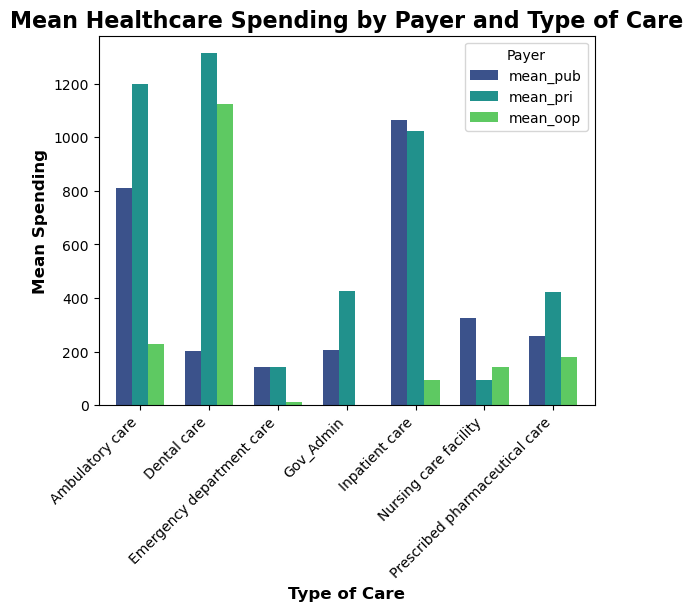

In [10]:
# Increased bar width and colour gradient for better visualisation

import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant variables for analysis
analysis_variables = ['mean_pub', 'mean_pri', 'mean_oop', 'type_of_care']

# Filter out rows with missing values in any of the selected variables
df_analysis = df[analysis_variables].dropna()

# Group by 'type_of_care' and calculate mean spending for each payer category
grouped_data = df_analysis.groupby('type_of_care')[['mean_pub', 'mean_pri', 'mean_oop']].mean()

# Plot the grouped bar chart with improvements
plt.figure(figsize=(14, 8))
colors = sns.color_palette("viridis", len(grouped_data.columns))  # Use a seaborn color palette

grouped_data.plot(kind='bar', color=colors, width=0.7)  # Increase bar width
plt.title('Mean Healthcare Spending by Payer and Type of Care', fontweight='bold', fontsize=16)
plt.xlabel('Type of Care', fontweight='bold', fontsize=12)
plt.ylabel('Mean Spending', fontweight='bold', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Payer', loc='upper right')  # Move legend to upper right
plt.show()


## Insights

1. **Mean out-of-pocket spending is highest for dental care.**
   - Dental care stands out with the highest mean out-of-pocket spending, indicating potential financial challenges for individuals seeking dental services.

2. **Top 3 categories with the highest mean private insurance payer: dental care, ambulatory care, inpatient care.**
   - Dental care, ambulatory care, and inpatient care lead in mean private insurance payments, suggesting significant private sector involvement in these healthcare areas.

3. **Mean public insurance payer is highest for inpatient care, second for ambulatory care.**
   - Inpatient care sees the highest mean public insurance payments, followed by ambulatory care, emphasizing the role of public programs in supporting these services.

4. **Out-of-pocket payments from lowest to highest: government administrative, emergency care, inpatient care, nursing facility care, prescribed pharma care, ambulatory care, dental care.**
   - A gradient of out-of-pocket payments exists, ranging from lowest for government administrative services to highest for dental care, shedding light on the financial burden across different healthcare needs.

5. **Private insurance is the lowest payer in nursing care facility.**
   - Nursing care facility services have the lowest mean private insurance payments, indicating potential gaps in private coverage for long-term care.

6. **Public insurance is the lowest payer for emergency department care.**
   - Emergency department care shows the lowest mean public insurance payments, raising questions about reimbursement structures and potential disparities in access.

7. **Emergency care has consistently the lowest mean payment across all three categories.**
   - Emergency care, across mean payments from all sources, consistently reflects the lowest figures, suggesting a unique financial landscape for emergency services.


## USA Healthcare Spending by Payer and Age Group (Excluding All Ages) from 1996 - 2016

<Figure size 2000x8000 with 0 Axes>

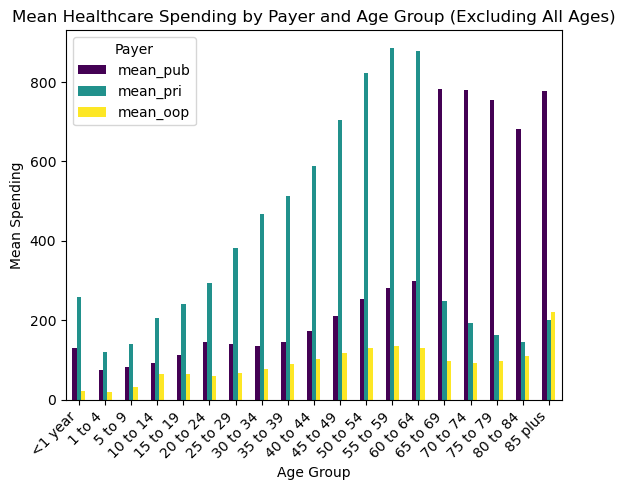

In [11]:
import re
import numpy as np
import matplotlib.pyplot as plt

# Select relevant variables for age analysis
age_analysis_variables = ['mean_pub', 'mean_pri', 'mean_oop', 'age_group_name']

# Exclude rows with 'All Ages' in 'age_group_name'
df_age_analysis = df[df['age_group_name'] != 'All Ages'][age_analysis_variables].dropna()

# Define a custom order for age groups
custom_order = ['<1 year', '1 to 4', '5 to 9', '10 to 14', '15 to 19', '20 to 24', '25 to 29', '30 to 34', 
                '35 to 39', '40 to 44', '45 to 49', '50 to 54', '55 to 59', '60 to 64', '65 to 69', 
                '70 to 74', '75 to 79', '80 to 84', '85 plus']

# Convert 'age_group_name' to categorical with the custom order
df_age_analysis['age_group_name'] = pd.Categorical(df_age_analysis['age_group_name'], categories=custom_order, ordered=True)

# Sort the DataFrame by 'age_group_name'
df_age_analysis = df_age_analysis.sort_values('age_group_name')

# Group by 'age_group_name' and calculate mean spending for each payer category
age_grouped_data = df_age_analysis.groupby('age_group_name')[['mean_pub', 'mean_pri', 'mean_oop']].mean()

# Plot the grouped bar chart for age groups
plt.figure(figsize=(20, 80))
age_grouped_data.plot(kind='bar', colormap='viridis')
plt.title('Mean Healthcare Spending by Payer and Age Group (Excluding All Ages)')
plt.xlabel('Age Group')
plt.ylabel('Mean Spending')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Payer')
plt.show()

## Insight

1. **Shifting Dynamics in Insurance Spending with Age:**
   - Until the age of 64, mean spending on primary insurance consistently surpasses mean spending on public insurance. However, this trend undergoes a notable shift post the age of 64, highlighting a potential transition in healthcare coverage patterns among the elderly population.

2. **Out-of-Pocket Spending Peaks for Individuals >85 Years:**
   - The analysis reveals that individuals aged over 85 experience the highest mean out-of-pocket spending. This emphasizes the financial burden faced by the oldest segment of the population, suggesting a need for targeted policies or support mechanisms to alleviate the economic challenges associated with healthcare in this age group.

3. **Private Insurance Preferences in Middle to Older Age:**
   - Examining the top private insurance mean-paying categories, a clear descending order is observed in the age groups 50-59, 60-64, and 50-54. Understanding the factors influencing private insurance preferences in these age brackets could inform strategies to enhance accessibility and affordability of private healthcare coverage for individuals in these demographic segments.

## USA Healthcare Spending by Payer and Gender (Excluding Both) from 1996 - 2016  

<Figure size 1000x3000 with 0 Axes>

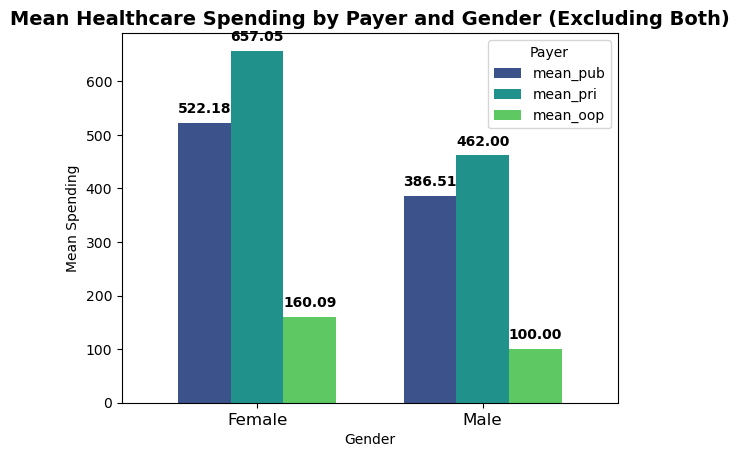

In [12]:
# Added values in visualisation

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Select relevant variables for gender analysis
gender_analysis_variables = ['mean_pub', 'mean_pri', 'mean_oop', 'sex']

# Exclude rows with 'Both' in 'sex'
df_gender_analysis = df[df['sex'] != 'Both'][gender_analysis_variables].dropna()

# Define a custom order for gender
custom_order = ['Female', 'Male']

# Convert 'sex' to categorical with the custom order
df_gender_analysis['sex'] = pd.Categorical(df_gender_analysis['sex'], categories=custom_order, ordered=True)

# Sort the DataFrame by 'sex'
df_gender_analysis = df_gender_analysis.sort_values('sex')

# Group by 'sex' and calculate mean spending for each payer category
gender_grouped_data = df_gender_analysis.groupby('sex')[['mean_pub', 'mean_pri', 'mean_oop']].mean()

# Increase the figure height
plt.figure(figsize=(10, 30))

# Plot the grouped bar chart for gender with improvements
colors = sns.color_palette("viridis", len(gender_grouped_data.columns))  # Use a seaborn color palette
ax = gender_grouped_data.plot(kind='bar', color=colors, width=0.7)  # Increase bar width
plt.title('Mean Healthcare Spending by Payer and Gender (Excluding Both)', fontweight='bold', fontsize=14)
plt.xlabel('Gender')
plt.ylabel('Mean Spending')
plt.xticks(rotation=0, ha='center', fontsize=12)  # Improve x-axis label readability
plt.legend(title='Payer')

# Show values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', 
                fontsize=10, fontweight='bold')

plt.show()


## Insights
1. The trend for both the genders for the type of payer is same starting from the least to the highest: Mean out of pocket, mean public insurance, mean primary insurance
2. Females pay higer in all categories than males

## USA Healthcare Spending Trends Over Time by Type of Care from 1996 - 2016

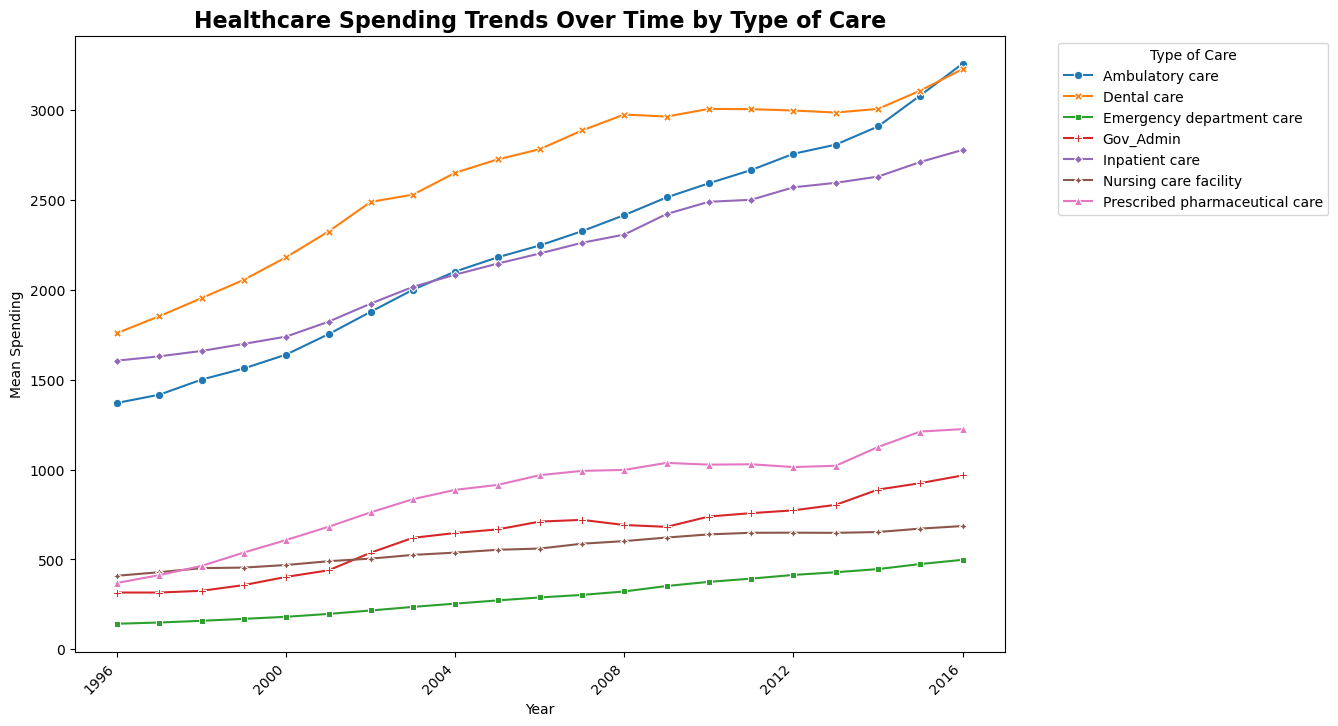

In [13]:
#One way to improve the visualization of temporal trends for specific types of care is to use a line plot 
# with different line styles or markers for each type of care. 
#This can make it easier to distinguish between the trends. 

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Temporal trends for specific types of care
care_yearly_spending = df.groupby(['year_id', 'type_of_care'])['mean_all'].mean().unstack()

# Set 'year_id' as the index for proper plotting
care_yearly_spending.index = pd.to_datetime(care_yearly_spending.index.get_level_values('year_id'), format='%Y')
care_yearly_spending.sort_index(inplace=True)

# Use a line plot with different line styles or markers for each type of care
plt.figure(figsize=(12, 8))
ax = sns.lineplot(data=care_yearly_spending, markers=True, dashes=False)

plt.title('Healthcare Spending Trends Over Time by Type of Care', fontweight='bold', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Mean Spending')
plt.legend(title='Type of Care', bbox_to_anchor=(1.05, 1), loc='upper left', labels=care_yearly_spending.columns)

# Improve x-axis label readability
plt.xticks(rotation=45, ha='right')

plt.show()



## Insights

1. **Dynamic Growth in Ambulatory and Inpatient Care Spending:**
   - Over the years, the fastest mean spending growth is observed for ambulatory and inpatient care. 
   - This upward trend signals increasing financial investments in outpatient and hospital-based services, possibly driven by factors such as technological advancements and a higher demand for these types of care.

2. **Stagnant Spending in Emergency and Nursing Care Facilities:**
   - Emergency care and nursing care facility mean spending experienced the slowest growth rate, nearly remaining constant over the years. 
   - This stability in spending suggests a potential need for further examination of resource allocation and policy considerations in these areas to meet healthcare demands effectively.

3. **Consistent Growth in Prescribed Medicine, Government Administration, and Nursing Care:**
   - Categories like prescribed medicine, government administration, nursing care, and emergency care exhibit similar growth rates and mean spending patterns. 
   - Exploring the underlying reasons for this consistency could inform policies aimed at optimizing resource allocation and improving cost-effectiveness.

4. **Similar Mean Spending and Growth Rates in Ambulatory, Dental, and Inpatient Care:**
   - Ambulatory, dental, and inpatient care demonstrate comparable mean spending and growth rates. 
   - Understanding the factors contributing to this parallelism can guide policymakers in developing strategies to address the evolving landscape of these essential healthcare services.

## Summary of Analysis

1. **Overall Healthcare Spending Trends (1996-2016):**
   - Steep increase in healthcare spending over the years, potentially linked to economic growth, aging population, and technological advancements.

2. **Gender-Based Spending Disparities:**
   - Females consistently spend more on healthcare than males, indicating notable gender disparities in healthcare expenses.
   - Potential higher financial burden on females, with varied spending patterns reflecting different health priorities.

3. **Age-Specific Healthcare Spending:**
   - Mean primary insurance spending consistently surpasses mean public insurance spending until the age of 64, indicating a shift post-64.
   - Out-of-pocket spending peaks for individuals above 85 years.
   - Private insurance preferences show descending order in the age groups 50-59, 60-64, and 50-54.

4. **Healthcare Spending by Type:**
   - Fastest mean spending growth observed for ambulatory and inpatient care.
   - Emergency and nursing care facilities experience slowest growth rate.
   - Consistent growth observed in prescribed medicine, government administration, nursing care, and emergency care.
   - Similar mean spending and growth rates in ambulatory, dental, and inpatient care.

5. **Top Spending Categories:**
   - Cardiovascular diseases, diabetes, and musculoskeletal disorders emerge as significant contributors to healthcare spending.
   - Lower spending observed for neoplasms and chronic respiratory diseases.
   - "Well Care" category holds a position among the lowest spending.

6. **Payer and Type of Care Analysis:**
   - Mean out-of-pocket spending is highest for dental care.
   - Top three categories with the highest mean private insurance payer: dental care, ambulatory care, inpatient care.
   - Mean public insurance payer is highest for inpatient care and second highest for ambulatory care.
   - Emergency care consistently has the lowest mean payment across all three payer categories.

7. **Policy Insights and Recommendations:**
   - Recommendations include aligning healthcare policies with economic growth, addressing gender-based spending gaps, developing targeted elderly healthcare support, and optimizing emergency care delivery.
   - Disease-specific recommendations focus on national health priorities, targeted interventions for diabetes and musculoskeletal disorders, preventive measures for cirrhosis, and comprehensive care for neoplasms and chronic respiratory diseases.

## Policy Recommendations

#### Economic and Demographic Factors:

1. **Economic Growth Impact:**
   - Align healthcare policies with economic growth to sustain increased healthcare spending. Foster a healthcare system that adapts to economic expansions without compromising affordability.

2. **Aging Population Influence:**
   - Develop targeted healthcare programs for the elderly, focusing on preventive measures and chronic disease management to efficiently address the rising healthcare needs associated with an aging population.

3. **Technological Advancements:**
   - Implement policies that facilitate the efficient adoption of medical technologies while managing associated costs. Promote research and development incentives to balance technological advancements with cost-effectiveness.

#### Gender Disparities in Healthcare Spending:

4. **Addressing Gender-Based Spending Gaps:**
   - Introduce initiatives aimed at reducing gender-based spending gaps, ensuring equitable access to healthcare services for both males and females.

5. **Tailored Healthcare Services:**
   - Encourage healthcare providers to tailor services based on gender-specific health needs, promoting inclusivity and targeted care delivery.

#### Age-Specific Healthcare Considerations:

6. **Elderly Healthcare Support:**
   - Implement support mechanisms for individuals over 85, recognizing their higher out-of-pocket spending. This could include targeted financial assistance or insurance programs.

7. **Private Insurance Preferences:**
   - Investigate factors influencing private insurance preferences in the 50-59, 60-64, and 50-54 age brackets. Develop strategies to enhance accessibility and affordability of private healthcare coverage for these demographics.

#### Healthcare Spending by Type:

8. **Dental Care Affordability:**
   - Address the high mean out-of-pocket spending in dental care by exploring avenues to enhance affordability, potentially through expanded insurance coverage or targeted assistance programs.

9. **Optimizing Emergency Care Delivery:**
   - Analyze the reasons behind low mean spending on Emergency Department Care. Implement strategies to optimize emergency care delivery, ensuring efficient use of resources without compromising accessibility.

10. **Balanced Approach to Inpatient and Ambulatory Care:**
    - Assess the quality and outcomes of inpatient and ambulatory care to ensure a balanced approach to healthcare delivery. Develop approaches to enhance the effectiveness of these services.

11. **Strategic Interventions for Top 3 Spending Categories:**
    - Develop targeted interventions for Inpatient Care, Ambulatory Care, and Dental Care to achieve a more balanced and cost-effective healthcare landscape. Consider initiatives for preventive dental care and cost containment measures.

#### Disease-Specific Recommendations:

12. **National Health Priorities - Cardiovascular Diseases:**
    - Prioritize efforts focused on the prevention, early detection, and management of cardiovascular diseases to achieve long-term cost savings.

13. **Targeted Interventions for Diabetes and Musculoskeletal Disorders:**
    - Implement interventions and public health campaigns to address the significant contributions of diabetes and musculoskeletal disorders to healthcare spending.

14. **Preventive Measures for Cirrhosis and Risk Factors:**
    - Explore policies emphasizing preventive measures, public health education, and lifestyle interventions to reduce the prevalence of cirrhosis and associated risk factors.

15. **Comprehensive Care Approach for Neoplasms and Chronic Respiratory Diseases:**
    - Advocate for a holistic approach to cancer care and respiratory health, combining preventive strategies and advanced treatments to improve outcomes and potentially reduce long-term healthcare costs.

16. **Promotion of Well Care and Preventive Health:**
    - Develop and promote initiatives encouraging preventive healthcare measures, routine check-ups, and public health campaigns to facilitate proactive health management.

17. **Emergency Care Financial Landscape:**
    - Investigate the unique financial landscape of emergency care. Develop strategies to address potential disparities in access and reimbursement structures, ensuring financial sustainability for emergency services.

These recommendations aim to address key insights from the analysis and contribute to the development of effective, inclusive, and sustainable healthcare strategies.